In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing,

In [84]:
class Perceptron:
    """
    Stocastic Perceptron neuron
    """

    def __init__(self, learning_rate=0.1):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = 0.1
        self._b = 0  # y-intercept
        self._w =  None # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def weightUpdate(self, x, y):
        for i in range(len(self._w)):
            multiplier = y * x[i]
            self._w[i] += (self.learning_rate * multiplier)
            
    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._w = np.ones((x.shape[1], 1))
        self.misclassified_samples = []

        for _ in range(n_iter):
            ####### YOUR CODE HERE #######
            yPred = self.predict(x)
            numOfBadPredictions = 0;
            for i in range(len(yPred)):
                x_ = x[i]
                y_ = y[i]
                if y_ != yPred[i]:
                    numOfBadPredictions = numOfBadPredictions + 1
                    self.weightUpdate(x_,y_)
                    self._b += self.learning_rate * y_
            difference = len(y) - numOfBadPredictions
            division = difference/(len(y))
            percentage = division*100
            print("Accuracy %:", round(percentage, 4))
            ####### END YOUR CODE HERE #######
            self.misclassified_samples.append(numOfBadPredictions)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        
        ####### YOUR CODE HERE #######
        weight = self._w
        _bias = self._b
        
        dotMultiply = np.dot(x, weight)
        return sum(dotMultiply + _bias)
        ####### END YOUR CODE HERE #######

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        ####### YOUR CODE HERE #######
        rawOutputs = []
        for elem in x:
            rawOutputs.append(self.f(elem))
            
        binaryOutputs = []
        for o in rawOutputs:
            if o >= 0:
                binaryOutputs.append(1)
            else:
                binaryOutputs.append(-1)
        return np.array(binaryOutputs)
        ####### END YOUR CODE HERE #######

In [85]:
import pandas as pd
###### YOUR CODE HERE ######
df = pd.read_csv("iris.data.csv", header = None)###### Read iris data set using pandas ######
###### YOUR CODE ENDS HERE ######
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


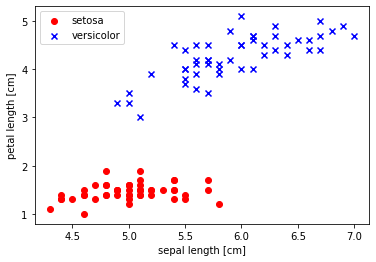

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
###### YOUR CODE HERE ######
####select Iris-setosa using np.where. Make sure you take extra care of the indexing####
y = np.where(df.iloc[:,4] == "Iris-setosa", 1, -1)
###### YOUR CODE ENDS HERE ######



###### YOUR CODE HERE ######
# extract sepal length and petal length
X = df.iloc[:,[0,2]].to_numpy()
###### YOUR CODE ENDS HERE ######

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Accuracy %: 33.3333
Accuracy %: 66.6667
Accuracy %: 66.6667
Accuracy %: 66.6667
Accuracy %: 100.0
Accuracy %: 100.0
Accuracy %: 100.0
Accuracy %: 100.0
Accuracy %: 100.0
Accuracy %: 100.0


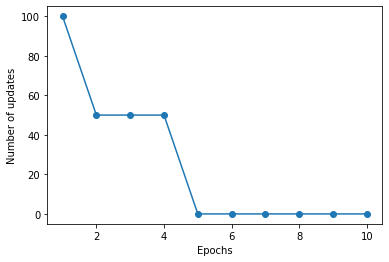

In [87]:
classifier = Perceptron(learning_rate=0.01)
classifier.fit(X, y)

plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [88]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

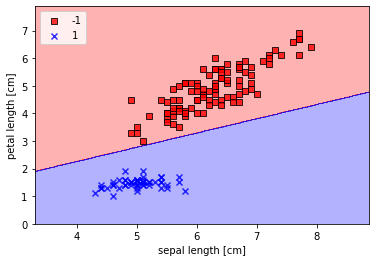

In [89]:
plot_decision_regions(X, y, classifier=classifier)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [90]:
####Note that Perceptron class has "n_features" attribute which is the number of features in the dataset.

classifier = Perceptron(learning_rate=0.001, n_features=2)
for i in range(0, 10):
    classifier.fit(X, y)
    plot_decision_regions(X, y, classifier=classifier)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_features'